#Data Acquisition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

data = pd.read_csv("loan-train.csv")
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


There are 12 features Loan ID, Gender, Married, Dependents,
Education, Self Employed, Applicant Income, Co-applicant Income, Loan Amount,
Loan Amount Term, Credit History, Property Area, which determine the label: Loan_Status. Let us visualize the distribution of values in each feature.

#Data Preprocessing

##Data Visualization

Male      489
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

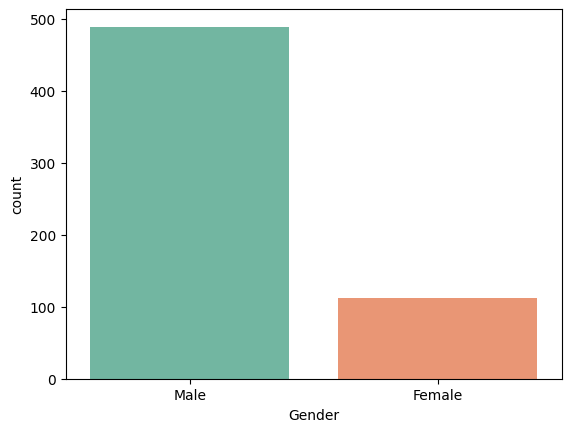

In [ ]:
print(data['Gender'].value_counts())
sns.countplot(x='Gender',data=data,palette= 'Set2')

Yes    398
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

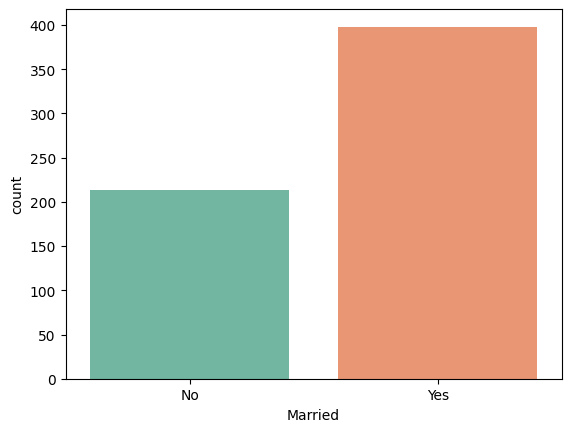

In [ ]:
print(data['Married'].value_counts())
sns.countplot(x='Married',data=data,palette= 'Set2')

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

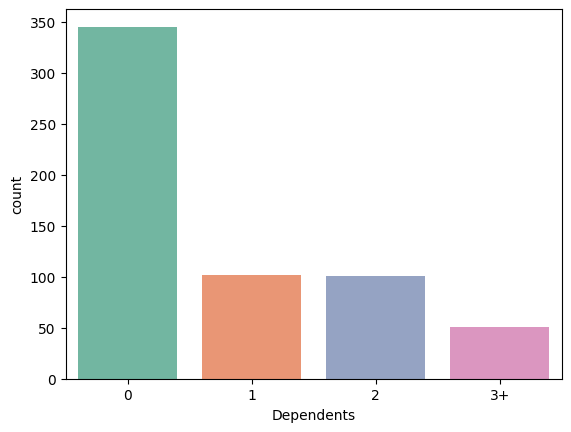

In [ ]:
print(data['Dependents'].value_counts())
sns.countplot(x='Dependents',data=data,palette= 'Set2')

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

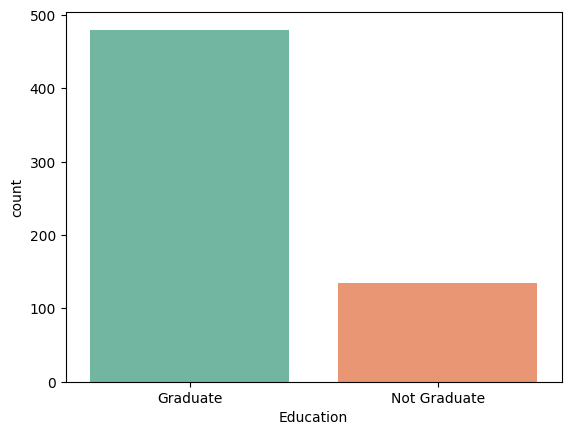

In [ ]:
print(data['Education'].value_counts())
sns.countplot(x='Education',data=data,palette= 'Set2')

No     500
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

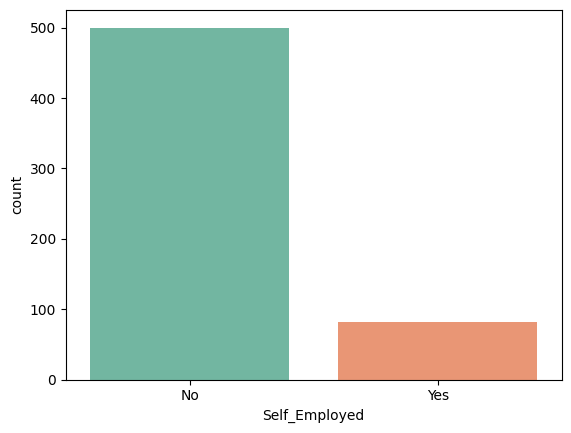

In [ ]:
print(data['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=data,palette= 'Set2')

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


<Axes: xlabel='ApplicantIncome', ylabel='count'>

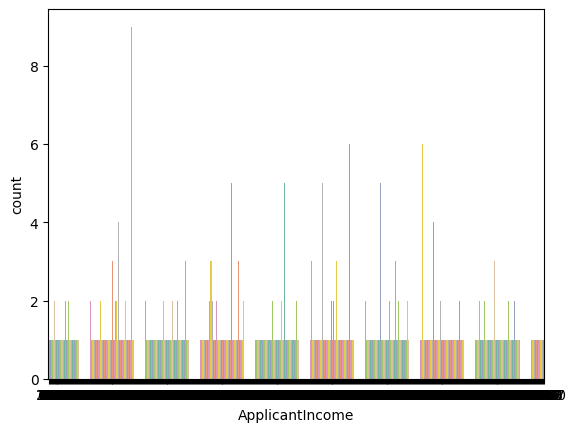

In [ ]:
print(data['ApplicantIncome'].value_counts())
sns.countplot(x='ApplicantIncome',data=data,palette= 'Set2')

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


<Axes: xlabel='CoapplicantIncome', ylabel='count'>

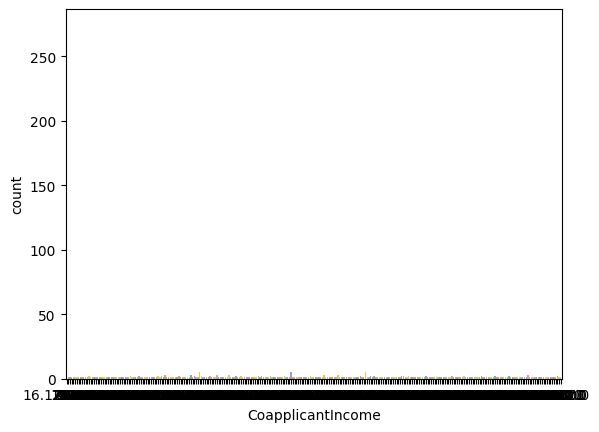

In [ ]:
print(data['CoapplicantIncome'].value_counts())
sns.countplot(x='CoapplicantIncome',data=data,palette= 'Set2')

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

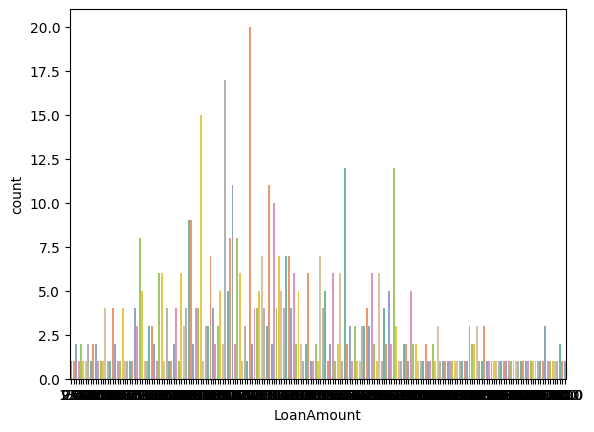

In [ ]:
print(data['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=data,palette= 'Set2')

1.0    475
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

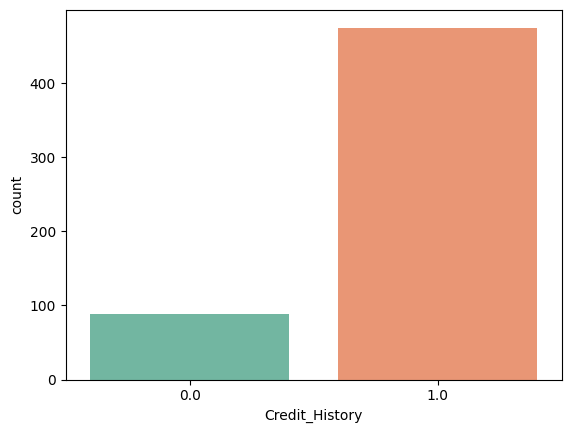

In [ ]:
print(data['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=data,palette= 'Set2')

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<Axes: xlabel='Property_Area', ylabel='count'>

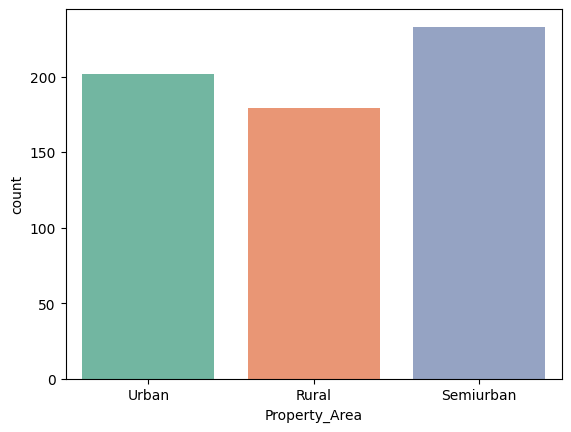

In [ ]:
print(data['Property_Area'].value_counts())
sns.countplot(x='Property_Area',data=data,palette= 'Set2')

We can see that Loan Amount, Loan Amount Term, Applicant Income, CoApplicant Income are numerical data and the rest is categorical data, such as Property Area having 3 categories- Urban, Rural and Semiurban.

##Data Cleaning

###Remove Redundancy

####Redundant Columns

We observe from the first few records of the dataset that the feature Loan ID is redundant , and thus can be dropped. It does not impact our prediction and was simply used to identify each sample.

In [ ]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We check if there is any column that has the same value for all the records

In [ ]:
# get number of unique values for each column
counts = data.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)

[]


####Redundant Rows

We check if there are any duplicate rows

In [ ]:
dups = data.duplicated()
print(dups.any())

False


###Outlier Detection and Removal

We check visualize the outliers for the non-categorical data

<Axes: >

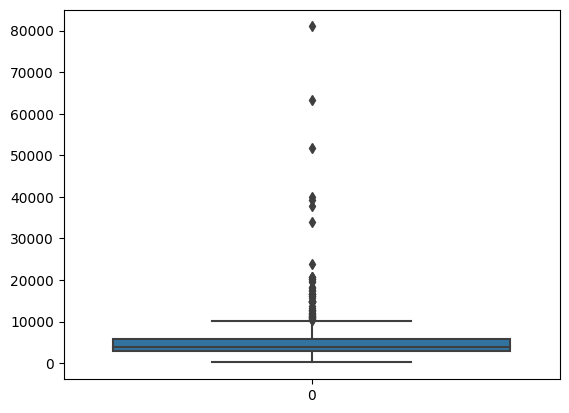

In [ ]:
import seaborn as sns
sns.boxplot(data['ApplicantIncome'])

<Axes: >

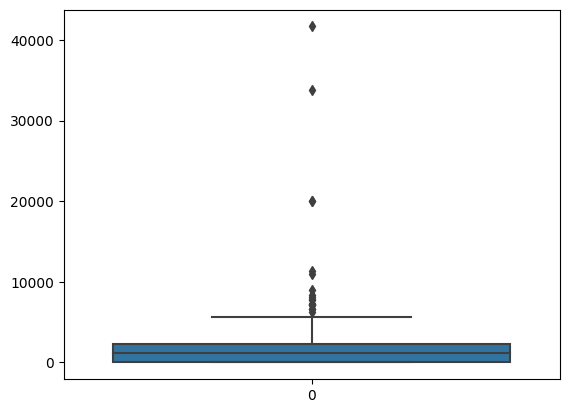

In [ ]:
sns.boxplot(data['CoapplicantIncome'])

<Axes: >

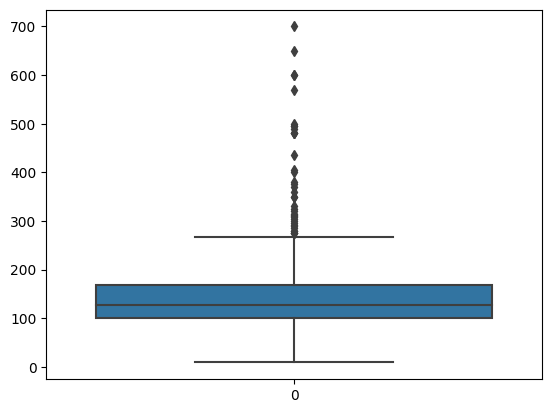

In [ ]:
sns.boxplot(data['LoanAmount'])

Removing Outliers

In [ ]:
import plotly.express as px
print("Standard Deviation before log transformation\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))

print("\nHistograms depicting distribution before removing outliers:\n")
fig = px.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()

Standard Deviation before log transformation

ApplicantIncome:  6104.0648565338915
CoapplicantIncome:  2923.8644597700595
LoanAmount:  85.51500809120331

Histograms depicting distribution before removing outliers:



We perform Log Transformation to reduce the effect of outliers

In [ ]:
data["ApplicantIncome"] = np.log(data["ApplicantIncome"])
data["CoapplicantIncome"] = [np.log(i) if i!=0 else 0 for i in data["CoapplicantIncome"]]
data["LoanAmount"] = np.log(data["LoanAmount"])

In [ ]:
print("Standard Deviation after log transformation:\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))

plt.figure(figsize=(10,4))
fig = px.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()

Standard Deviation after log transformation:

ApplicantIncome:  0.6447375297521023
CoapplicantIncome:  3.8725225987499248
LoanAmount:  0.5047152496022174


<Figure size 1000x400 with 0 Axes>

<Axes: >

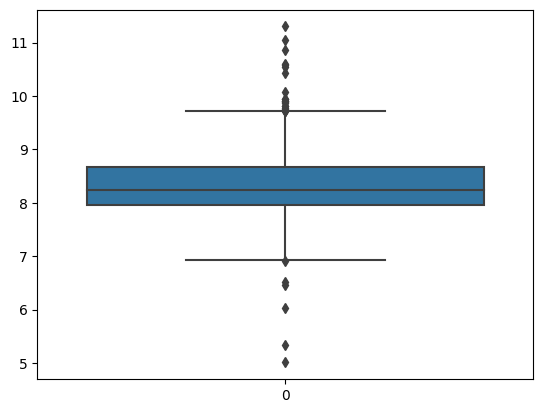

In [ ]:
sns.boxplot(data['ApplicantIncome'])

<Axes: >

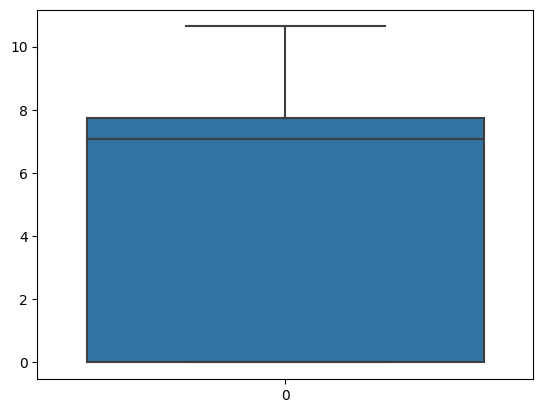

In [ ]:
sns.boxplot(data['CoapplicantIncome'])

<Axes: >

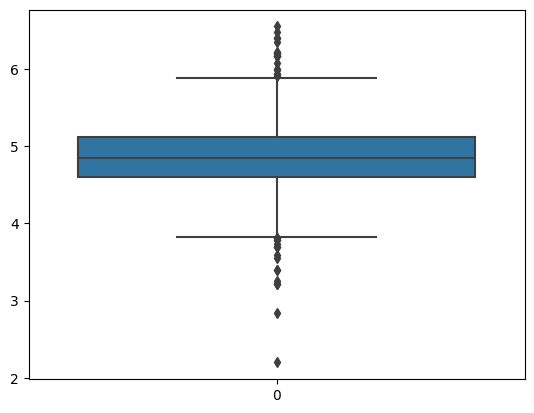

In [ ]:
sns.boxplot(data['LoanAmount'])

###Handling Missing Data

In [ ]:
print(data.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Handling Missing Data by filling it with mode value of the variable

In [ ]:
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data["Married"].fillna(data["Married"].mode()[0],inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)
data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)

In [ ]:
print(data.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


##Data Transforms

###Encoding of Categorical Data

In [ ]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.000000,4.852030,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,360.0,1.0,Urban,Y


In [ ]:
data["Dependents"] = data["Dependents"].replace('3+',int(3))
data["Dependents"] = data["Dependents"].replace('1',int(1))
data["Dependents"] = data["Dependents"].replace('2',int(2))
data["Dependents"] = data["Dependents"].replace('0',int(0))

The strings in dependents are changed to integers. For the remaining features, label encoder is used to encode the categorical data.

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab= LabelEncoder()
data["Gender"] = lab.fit_transform(data["Gender"])
data["Married"] = lab.fit_transform(data["Married"])
data["Education"] = lab.fit_transform(data["Education"])
data["Self_Employed"] = lab.fit_transform(data["Self_Employed"])
data["Property_Area"] = lab.fit_transform(data["Property_Area"])
data["Loan_Status"] = lab.fit_transform(data["Loan_Status"])
datadr=data #This variable is used later for PCA
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.000000,4.852030,360.0,1.0,2,1
1,1,1,1,0,0,8.430109,7.318540,4.852030,360.0,1.0,0,0
2,1,1,0,0,1,8.006368,0.000000,4.189655,360.0,1.0,2,1
3,1,1,0,1,0,7.856707,7.765569,4.787492,360.0,1.0,2,1
4,1,0,0,0,0,8.699515,0.000000,4.948760,360.0,1.0,2,1


###Train-Test Split
25% for testing, 75% for training

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(["Loan_Status"],axis=1)
y = data["Loan_Status"]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

###Scaling of Numerical Data

Before Scaling:/n


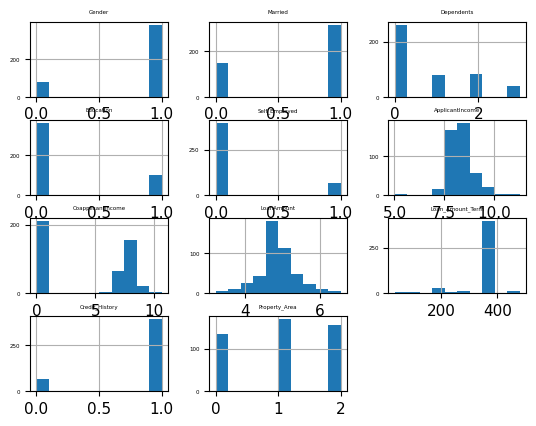

In [ ]:
from matplotlib import pyplot
fig = X_train.hist(xlabelsize=11, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
print('Before Scaling:/n')
pyplot.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

After Scaling:/n


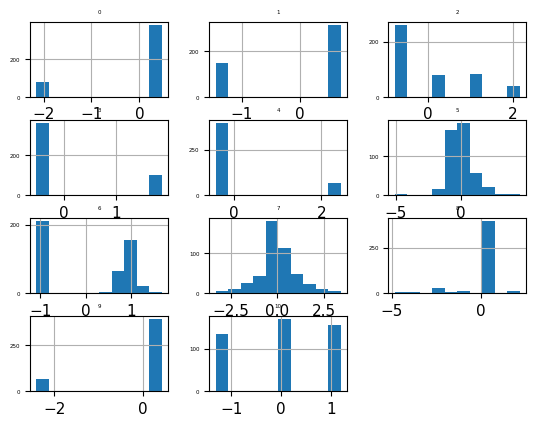

In [ ]:
from pandas import DataFrame
xt=DataFrame(X_train)
fig = xt.hist(xlabelsize=11, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
print('After Scaling:/n')
pyplot.show()

#Training of Model

##Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=1000,bootstrap=True)
RFC.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

##XGBoost

In [ ]:
from xgboost import XGBClassifier
XGBC = XGBClassifier(min_child_weight=10,n_estimators=1000)
XGBC.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

##SVM

In [ ]:
from sklearn.svm import SVC
SVM = SVC(kernel='linear')
SVM.fit(X_train,y_train)

SVC(kernel='linear')

##AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
ADA.fit(X_train,y_train)

AdaBoostClassifier()

#Model Evaluation

##Random Forest Classification

In [ ]:
from sklearn.metrics import classification_report ,confusion_matrix, accuracy_score,f1_score,recall_score, precision_score
from sklearn.model_selection import cross_val_score
y_pred = RFC.predict(X_test)
#print(classification_report(y_pred,y_test))
print("RandomForestClassifier Precision:>",precision_score(y_pred,y_test))
print("RandomForestClassifier Accuracy:>",accuracy_score(y_pred,y_test))
print("RandomForestClassifier Recall:>",recall_score(y_pred,y_test))
print("RandomForestClassifier F1 score:>",f1_score(y_pred,y_test))

RandomForestClassifier Precision:> 0.9279279279279279
RandomForestClassifier Accuracy:> 0.7922077922077922
RandomForestClassifier Recall:> 0.8110236220472441
RandomForestClassifier F1 score:> 0.865546218487395


##Logistic Regression

In [ ]:
y_pred = LR.predict(X_test)
#print(classification_report(y_pred,y_test))
print("Logistic Regression Precision:>",precision_score(y_pred,y_test))
print("Logistic Regression Accuracy:>",accuracy_score(y_pred,y_test))
print("Logistic Regression Recall:>",recall_score(y_pred,y_test))
print("Logistic Regression F1 score:>",f1_score(y_pred,y_test))

Logistic Regression Precision:> 0.9819819819819819
Logistic Regression Accuracy:> 0.8311688311688312
Logistic Regression Recall:> 0.8195488721804511
Logistic Regression F1 score:> 0.8934426229508197


##XGBoost

In [ ]:
y_pred = XGBC.predict(X_test)
#print(classification_report(y_pred,y_test))
print("XGBoost Precision:>",precision_score(y_pred,y_test))
print("XGBoost Accuracy:>",accuracy_score(y_pred,y_test))
print("XGBoost Recall:>",recall_score(y_pred,y_test))
print("XGBoost F1 score:>",f1_score(y_pred,y_test))

XGBoost Precision:> 0.2702702702702703
XGBoost Accuracy:> 0.4090909090909091
XGBoost Recall:> 0.75
XGBoost F1 score:> 0.39735099337748353


##SVM

In [ ]:
y_pred = SVM.predict(X_test)
#print(classification_report(y_pred,y_test))
print("SVM Precision:>",precision_score(y_pred,y_test))
print("SVM Accuracy:>",accuracy_score(y_pred,y_test))
print("SVM Recall:>",recall_score(y_pred,y_test))
print("SVM f1 score:>",f1_score(y_pred,y_test))

SVM Precision:> 0.9819819819819819
SVM Accuracy:> 0.8311688311688312
SVM Recall:> 0.8195488721804511
SVM f1 score:> 0.8934426229508197


##AdaBoost

In [ ]:
y_pred = ADA.predict(X_test)
#print(classification_report(y_pred,y_test))
print("AdaBoost Precision:>",precision_score(y_pred,y_test))
print("AdaBoost Accuracy:>",accuracy_score(y_pred,y_test))
print("AdaBoost Recall:>",recall_score(y_pred,y_test))
print("AdaBoost f1 score:>",f1_score(y_pred,y_test))

AdaBoost Precision:> 0.954954954954955
AdaBoost Accuracy:> 0.8246753246753247
AdaBoost Recall:> 0.828125
AdaBoost f1 score:> 0.8870292887029289


#Dimensionality Reduction

##Scaling of Numerical Data
We take the data we obtained after the step of Encoding of Categorical Data. Now, scaling of the data is carried out.

In [ ]:
df=datadr
df=df.drop(['Loan_Status'],axis=1)
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df))

##Check the correlation between features

<Axes: >

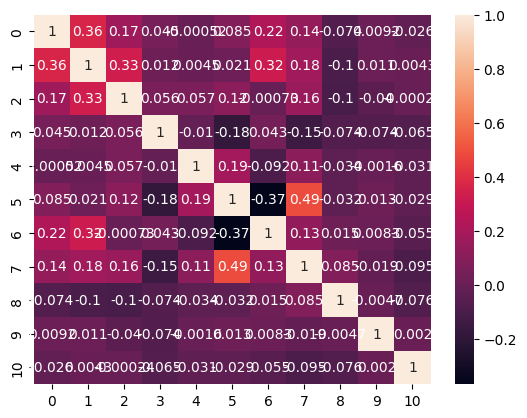

In [ ]:
import seaborn as sns
sns.heatmap(scaled_data.corr(),annot=True)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.990802,1.261408,0.060755,-1.158086,0.362616,-0.265181,0.060623,-1.222722,-0.463150,0.669801
1,-0.924649,-0.556066,-1.059376,0.173551,-0.585323,-0.553807,0.204411,0.646580,-0.495707,-0.180696
2,0.483104,0.430013,1.052100,-0.831059,-0.742143,2.352093,-0.980291,-0.351866,-1.640301,-0.913385
3,0.129281,-1.861062,0.152179,-0.194400,-0.056415,0.347204,-0.484991,-1.782335,0.882899,-0.553992
4,0.887949,1.343261,0.003030,-1.144753,0.385241,-0.270870,0.090614,-1.255746,-0.363656,0.692920


<Axes: >

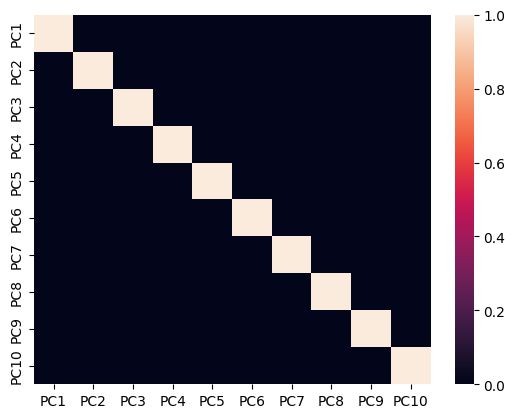

In [ ]:
sns.heatmap(data_pca.corr())

##Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
Xdr = data_pca
ydr = data["Loan_Status"]
X_traindr , X_testdr , y_traindr , y_testdr = train_test_split(Xdr,ydr,test_size=0.25,random_state=0)

##Training of Model

###Random Forest Classification

In [ ]:
RFCdr = RandomForestClassifier(n_estimators=1000,bootstrap=True)
RFCdr.fit(X_traindr,y_traindr)

RandomForestClassifier(n_estimators=1000)

###Logistic Regression

In [ ]:
LRdr = LogisticRegression()
LRdr.fit(X_traindr,y_traindr)

LogisticRegression()

###XGBoost

In [ ]:
XGBCdr = XGBClassifier(min_child_weight=10,n_estimators=1000)
XGBCdr.fit(X_traindr,y_traindr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

###SVM

In [ ]:
SVMdr = SVC(kernel='linear')
SVMdr.fit(X_traindr,y_traindr)

SVC(kernel='linear')

###AdaBoost

In [ ]:
ADAdr = AdaBoostClassifier()
ADAdr.fit(X_traindr,y_traindr)

AdaBoostClassifier()

##Model Evaluation

###Random Forest Classification

In [ ]:
y_predrdr = RFCdr.predict(X_testdr)
#print(classification_report(y_pred,y_test))
print("RandomForestClassifier Precision:>",precision_score(y_predrdr,y_testdr))
print("RandomForestClassifier Accuracy:>",accuracy_score(y_predrdr,y_testdr))
print("RandomForestClassifier Recall:>",recall_score(y_predrdr,y_testdr))
print("RandomForestClassifier F1 score:>",f1_score(y_predrdr,y_testdr))

RandomForestClassifier Precision:> 0.9009009009009009
RandomForestClassifier Accuracy:> 0.7857142857142857
RandomForestClassifier Recall:> 0.819672131147541
RandomForestClassifier F1 score:> 0.8583690987124463


###Logistic Regression

In [ ]:
y_predldr = LRdr.predict(X_testdr)
#print(classification_report(y_pred,y_test))
print("Logistic Regression Precision:>",precision_score(y_predldr,y_testdr))
print("Logistic Regression Accuracy:>",accuracy_score(y_predldr,y_testdr))
print("Logistic Regression Recall:>",recall_score(y_predldr,y_testdr))
print("Logistic Regression F1 score:>",f1_score(y_predldr,y_testdr))

Logistic Regression Precision:> 0.9819819819819819
Logistic Regression Accuracy:> 0.8311688311688312
Logistic Regression Recall:> 0.8195488721804511
Logistic Regression F1 score:> 0.8934426229508197


###XGBoost

In [ ]:
y_predxdr = XGBCdr.predict(X_testdr)
#print(classification_report(y_pred,y_test))
print("XGBoost Precision:>",precision_score(y_predxdr,y_testdr))
print("XGBoost Accuracy:>",accuracy_score(y_predxdr,y_testdr))
print("XGBoost Recall:>",recall_score(y_predxdr,y_testdr))
print("XGBoost F1 score:>",f1_score(y_predxdr,y_testdr))

XGBoost Precision:> 0.8558558558558559
XGBoost Accuracy:> 0.7467532467532467
XGBoost Recall:> 0.8050847457627118
XGBoost F1 score:> 0.8296943231441049


###SVM

In [ ]:
y_predsdr = SVMdr.predict(X_testdr)
#print(classification_report(y_pred,y_test))
print("SVM Precision:>",precision_score(y_predsdr,y_testdr))
print("SVM Accuracy:>",accuracy_score(y_predsdr,y_testdr))
print("SVM Recall:>",recall_score(y_predsdr,y_testdr))
print("SVM f1 score:>",f1_score(y_predsdr,y_testdr))

SVM Precision:> 0.9819819819819819
SVM Accuracy:> 0.8311688311688312
SVM Recall:> 0.8195488721804511
SVM f1 score:> 0.8934426229508197


###AdaBoost

In [ ]:
y_predadr = ADAdr.predict(X_testdr)
#print(classification_report(y_pred,y_test))
print("AdaBoost Accuracy:>",accuracy_score(y_predadr,y_testdr))
print("AdaBoost Precision:>",precision_score(y_predadr,y_testdr))
print("AdaBoost Recall:>",recall_score(y_predadr,y_testdr))
print("AdaBoost f1 score:>",f1_score(y_predadr,y_testdr))

AdaBoost Accuracy:> 0.7857142857142857
AdaBoost Precision:> 0.9009009009009009
AdaBoost Recall:> 0.819672131147541
AdaBoost f1 score:> 0.8583690987124463
